In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("Delhi Climate Data 2013.csv", index_col = "date", parse_dates=True)   

In [3]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [5]:
df.index.freq = "D" 

In [6]:
df = df.dropna()

In [7]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [8]:
df = df[["humidity"]] 

In [9]:
train = df.iloc[:1097, 0]
test = df.iloc[1097:, 0] 

In [10]:
train

date
2013-01-01    84.500000
2013-01-02    92.000000
2013-01-03    87.000000
2013-01-04    71.333333
2013-01-05    86.833333
                ...    
2015-12-29    65.000000
2015-12-30    71.750000
2015-12-31    71.375000
2016-01-01    72.285714
2016-01-02    75.875000
Freq: D, Name: humidity, Length: 1097, dtype: float64

In [11]:
test

date
2016-01-03     74.750000
2016-01-04     77.125000
2016-01-05     88.833333
2016-01-06     81.625000
2016-01-07     87.000000
                 ...    
2016-12-28     68.043478
2016-12-29     87.857143
2016-12-30     89.666667
2016-12-31     87.000000
2017-01-01    100.000000
Freq: D, Name: humidity, Length: 365, dtype: float64

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [13]:
Seasonal_Results = seasonal_decompose(df) 

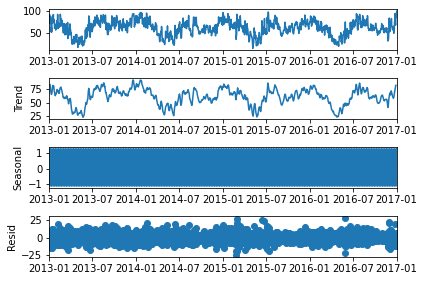

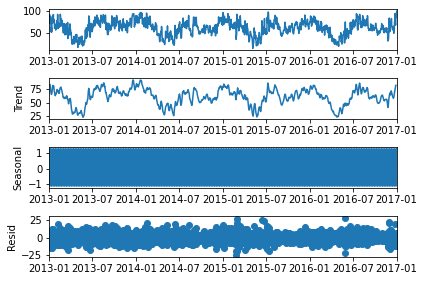

In [14]:
Seasonal_Results.plot() 

<AxesSubplot:xlabel='date'>

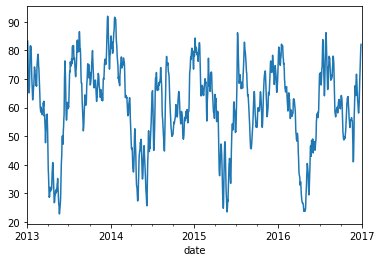

In [15]:
Seasonal_Results.trend.plot() 

<AxesSubplot:xlabel='date'>

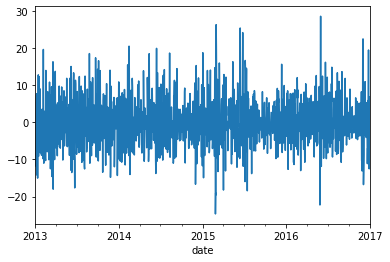

In [16]:
Seasonal_Results.resid.plot() 

<AxesSubplot:xlabel='date'>

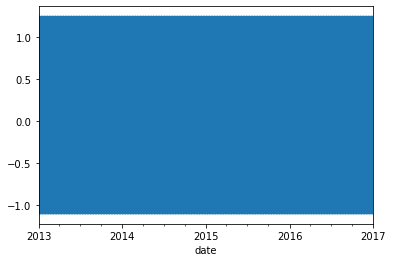

In [17]:
Seasonal_Results.seasonal.plot() 

In [18]:
from pmdarima import auto_arima 

In [19]:
#PACF and ACF

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

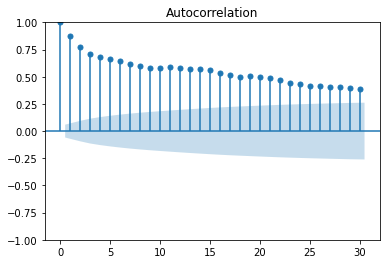

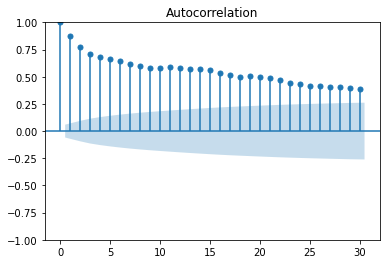

In [21]:
plot_acf(train, lags=30) 

C:\Users\alexh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


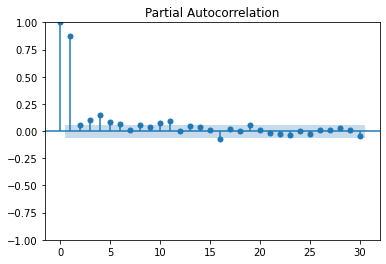

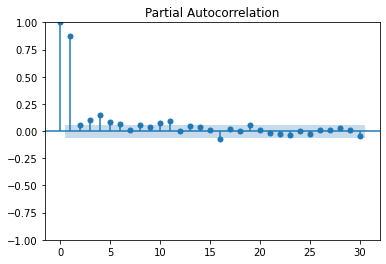

In [22]:
plot_pacf(train, lags=30) 

In [23]:
auto_arima(train, trace=True) 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=7674.365, Time=2.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9302.114, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=7727.011, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8501.170, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12228.853, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=7700.245, Time=0.80 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=7677.665, Time=1.93 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=7677.340, Time=2.69 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=7673.755, Time=2.48 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=7675.497, Time=1.25 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=7675.609, Time=2.80 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=7679.248, Time=2.42 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=7674.339, Time=1.79 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.89 sec
 ARIMA(2,0,3)(0,0,0)[0]             :

ARIMA(order=(2, 0, 3), scoring_args={}, suppress_warnings=True)

In [24]:
#P = 2
#D = 0 
#Q = 3

In [25]:
from statsmodels.tsa.arima.model import ARIMA 

In [26]:
A_model = ARIMA(train, order=(2, 0, 3)) 

In [27]:
predictor = A_model.fit() 

In [28]:
predictor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               humidity   No. Observations:                 1097
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -3829.901
Date:                Sun, 12 Mar 2023   AIC                           7673.803
Time:                        17:09:09   BIC                           7708.805
Sample:                    01-01-2013   HQIC                          7687.046
                         - 01-02-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.6179      4.229     14.570      0.000      53.329      69.907
ar.L1          1.3104      0.147      8.895      0.000       1.022       1.599
ar.L2         -0.3238      0.143     -2.266      0.023      -0.604      -0.044
ma.L1         -0.5366      0.146     -3.687      0.000      -0.822      -0.251
ma.L2         -0.1265      0.048     -2.638      0.008      -0.221      -0.033
ma.L3         -0.0943      0.052     -1.809      0.070      -0.196       0.008
sigma2        62.9955      2.138     29.458      0.000      58.804      67.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               183.46
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.53
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
PredictedResults = predictor.predict(start=len(train), end=len(train) + len(test) - 1, type="Levels") 

In [30]:
PredictedResults

2016-01-03    73.656851
2016-01-04    71.876599
2016-01-05    70.662315
2016-01-06    70.147843
2016-01-07    69.866874
                ...    
2016-12-28    61.624010
2016-12-29    61.623888
2016-12-30    61.623768
2016-12-31    61.623651
2017-01-01    61.623535
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


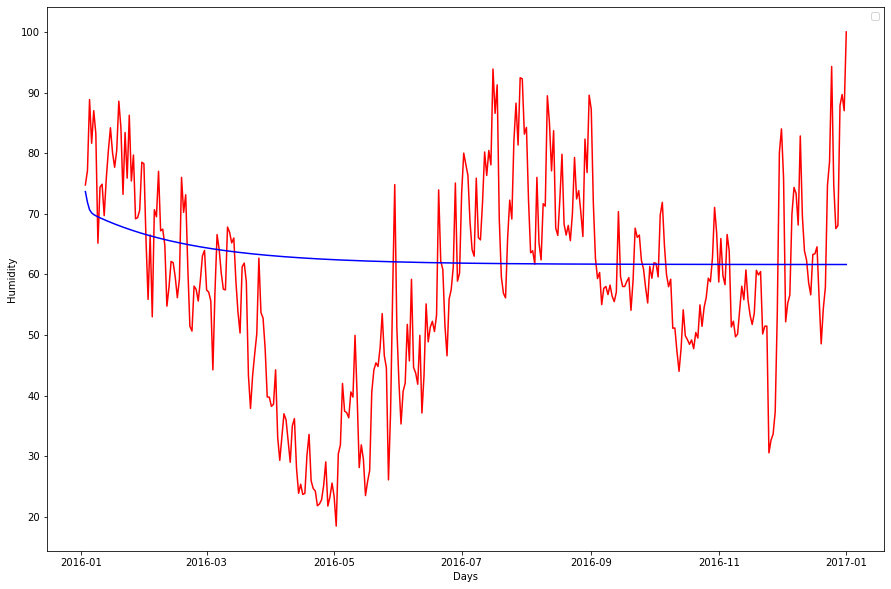

In [32]:
plt.figure(figsize=(15, 10))
plt.plot(test, color="red")
plt.plot(PredictedResults, color="blue")
plt.xlabel("Days")
plt.ylabel("Humidity")
plt.legend()
plt.show() 

In [33]:
import math

In [34]:
from sklearn.metrics import mean_squared_error 

In [35]:
RMSE = math.sqrt(mean_squared_error(test, PredictedResults)) 

In [36]:
RMSE

16.76297859299454

In [ ]:
#ARIMA Round 2 

In [43]:
df = pd.read_csv("Delhi Climate Data 2013.csv", index_col="date", parse_dates=True) 

In [44]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [45]:
df.index.freq = "D" 

In [46]:
df = df.dropna() 

In [47]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [48]:
df = df[["meantemp"]] 

In [49]:
df

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


In [50]:
train = df.iloc[:1097, 0] 
test = df.iloc[1097:, 0] 

In [51]:
train

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2015-12-29    16.375000
2015-12-30    15.500000
2015-12-31    15.000000
2016-01-01    14.714286
2016-01-02    14.000000
Freq: D, Name: meantemp, Length: 1097, dtype: float64

In [52]:
test

date
2016-01-03    14.375000
2016-01-04    15.750000
2016-01-05    15.833333
2016-01-06    17.375000
2016-01-07    17.125000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Freq: D, Name: meantemp, Length: 365, dtype: float64

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose    

In [55]:
Seasonal_Results = seasonal_decompose(df) 

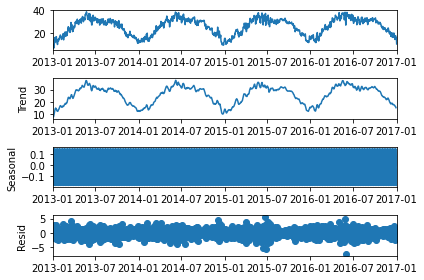

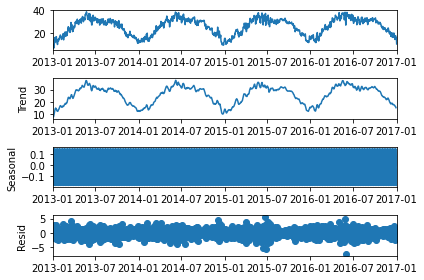

In [57]:
Seasonal_Results.plot()

<AxesSubplot:xlabel='date'>

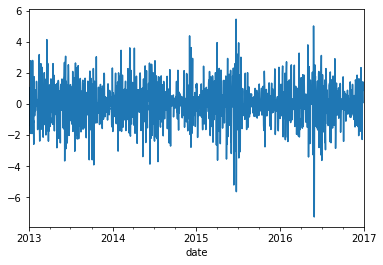

In [59]:
Seasonal_Results.resid.plot() 

<AxesSubplot:xlabel='date'>

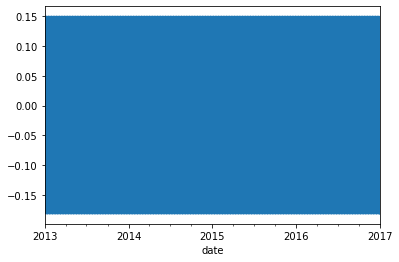

In [60]:
Seasonal_Results.seasonal.plot()

<AxesSubplot:xlabel='date'>

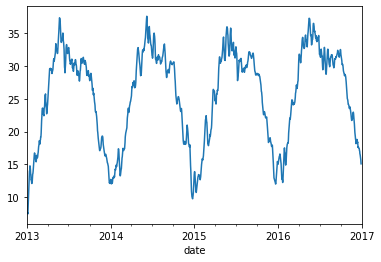

In [62]:
Seasonal_Results.trend.plot()

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

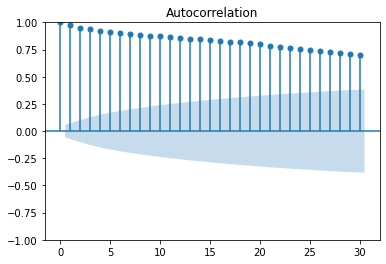

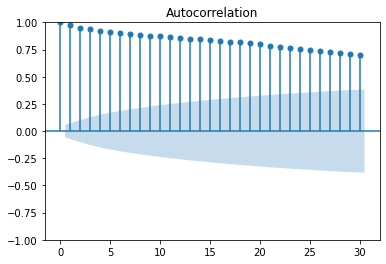

In [65]:
plot_acf(train, lags=30)

C:\Users\alexh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


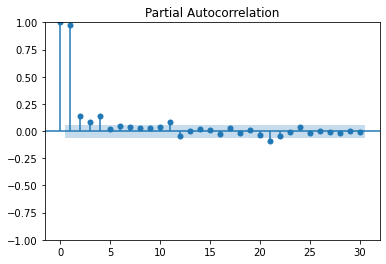

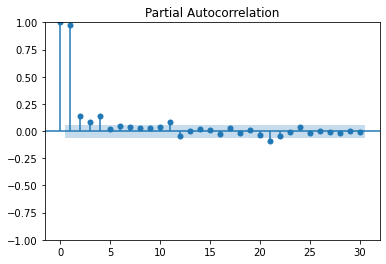

In [66]:
plot_pacf(train, lags=30)

In [68]:
from pmdarima import auto_arima 

In [69]:
auto_arima(train, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4175.553, Time=1.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7512.661, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4239.989, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6375.322, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10266.041, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4190.477, Time=0.77 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4173.555, Time=1.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4205.346, Time=0.49 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4213.525, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4175.553, Time=1.75 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4205.584, Time=0.69 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=4175.473, Time=2.32 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4174.878, Time=0.17 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 9.954 seconds


ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True)

In [72]:
from statsmodels.tsa.arima.model import ARIMA

In [73]:
A_model = ARIMA(train, order=(2, 0, 1)) 

In [75]:
predictor = A_model.fit() 

In [79]:
PredictedResults = predictor.predict(start=len(train), end=len(train)+len(test)-1, type="Levels") 

In [80]:
PredictedResults 

2016-01-03    14.218800
2016-01-04    14.353992
2016-01-05    14.442118
2016-01-06    14.503728
2016-01-07    14.550377
                ...    
2016-12-28    19.623092
2016-12-29    19.629138
2016-12-30    19.635158
2016-12-31    19.641152
2017-01-01    19.647120
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


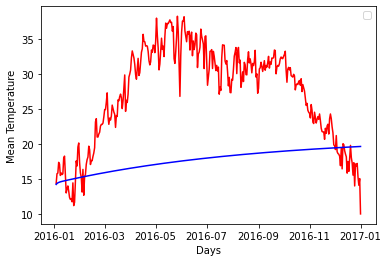

In [81]:
plt.plot(test, color="red")
plt.plot(PredictedResults, color="blue")
plt.xlabel("Days")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show() 

In [82]:
import math 
from sklearn.metrics import mean_squared_error 

In [83]:
RMSE = math.sqrt(mean_squared_error(test, PredictedResults)) 

In [84]:
RMSE

11.541288136935412

In [85]:
#RMSE round 3 

In [86]:
df = pd.read_csv("Delhi Climate Data 2013.csv", index_col="date", parse_dates=True)

In [87]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [88]:
df = df.dropna() 

In [89]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [90]:
df.index.freq = "D" 

In [91]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [92]:
df = df[["wind_speed"]] 

In [93]:
df

,wind_speed
date,
2013-01-01,0.000000
2013-01-02,2.980000
2013-01-03,4.633333
2013-01-04,1.233333
2013-01-05,3.700000
...,...
2016-12-28,3.547826
2016-12-29,6.000000
2016-12-30,6.266667


In [94]:
train = df.iloc[:1097, 0] 
test = df.iloc[1097:, 0] 

In [95]:
train

date
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    3.700000
                ...   
2015-12-29    7.412500
2015-12-30    2.100000
2015-12-31    2.087500
2016-01-01    1.057143
2016-01-02    2.087500
Freq: D, Name: wind_speed, Length: 1097, dtype: float64

In [96]:
test

date
2016-01-03    5.112500
2016-01-04    0.000000
2016-01-05    0.616667
2016-01-06    2.312500
2016-01-07    0.000000
                ...   
2016-12-28    3.547826
2016-12-29    6.000000
2016-12-30    6.266667
2016-12-31    7.325000
2017-01-01    0.000000
Freq: D, Name: wind_speed, Length: 365, dtype: float64

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [98]:
Seasonal_Results = seasonal_decompose(df) 

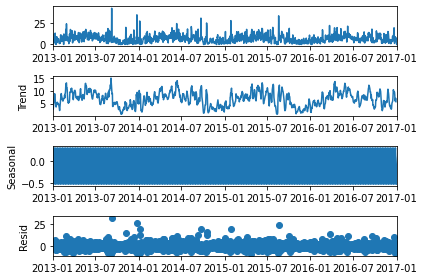

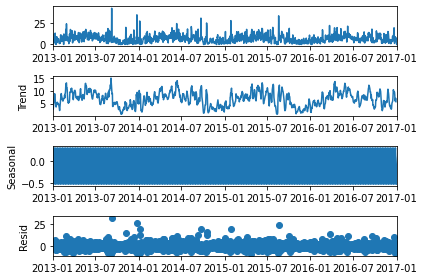

In [99]:
Seasonal_Results.plot() 

<AxesSubplot:xlabel='date'>

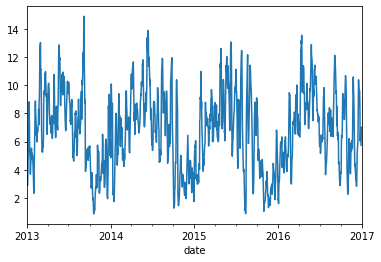

In [101]:
Seasonal_Results.trend.plot()

<AxesSubplot:xlabel='date'>

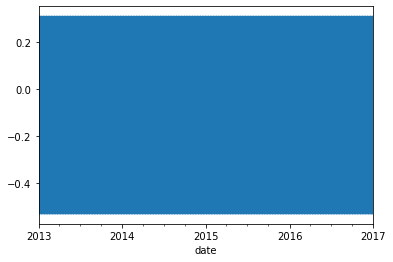

In [102]:
Seasonal_Results.seasonal.plot() 

<AxesSubplot:xlabel='date'>

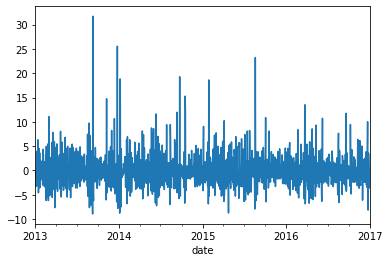

In [103]:
Seasonal_Results.resid.plot() 

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

C:\Users\alexh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


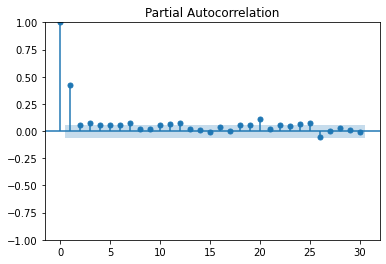

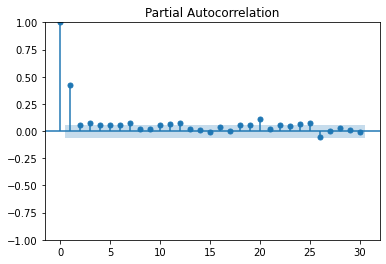

In [109]:
plot_pacf(train, lags=30) 

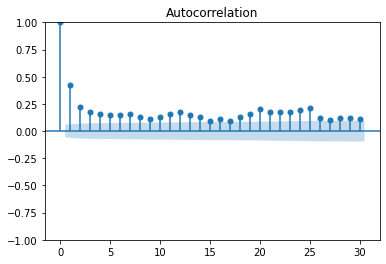

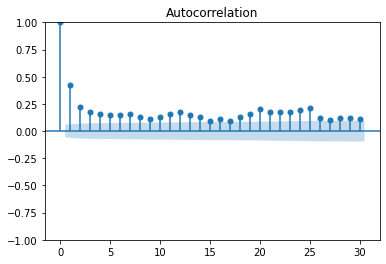

In [110]:
plot_acf(train, lags=30) 

In [111]:
from pmdarima import auto_arima 

In [112]:
auto_arima(train, trace=True) 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6269.786, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6676.917, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6553.416, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6360.909, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6674.917, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6267.785, Time=0.76 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6271.081, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6266.336, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6267.775, Time=0.65 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6477.121, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6264.382, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6358.912, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6551.416, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6265.818, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [113]:
from statsmodels.tsa.arima.model import ARIMA 

In [114]:
A_Model = ARIMA(train, order=(1, 1, 1)) 

In [116]:
predictor = A_Model.fit() 

In [117]:
predictor.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             wind_speed   No. Observations:                 1097
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3129.191
Date:                Sun, 12 Mar 2023   AIC                           6264.382
Time:                        17:33:29   BIC                           6279.381
Sample:                    01-01-2013   HQIC                          6270.057
                         - 01-02-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3113      0.020     15.569      0.000       0.272       0.351
ma.L1         -0.9573      0.009   -106.782      0.000      -0.975      -0.940
sigma2        17.6478      0.303     58.188      0.000      17.053      18.242
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              6588.77
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             2.03
Prob(H) (two-sided):                  0.04   Kurtosis:                        14.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [118]:
PredictedResults = predictor.predict(start=len(train), end=len(train) + len(test) - 1, type="Levels") 

In [119]:
PredictedResults

2016-01-03    3.119916
2016-01-04    3.441346
2016-01-05    3.541420
2016-01-06    3.572577
2016-01-07    3.582277
                ...   
2016-12-28    3.586663
2016-12-29    3.586663
2016-12-30    3.586663
2016-12-31    3.586663
2017-01-01    3.586663
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


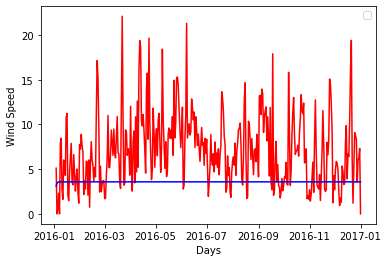

In [120]:
plt.plot(test, color="red")
plt.plot(PredictedResults, color="blue")
plt.xlabel("Days")
plt.ylabel("Wind Speed")
plt.legend()
plt.show() 

In [121]:
import math 
from sklearn.metrics import mean_squared_error

In [122]:
RMSE = math.sqrt(mean_squared_error(test, PredictedResults)) 

In [123]:
RMSE

5.3658594501933665

In [124]:
df = pd.read_csv("Delhi Climate Data 2013.csv", index_col="date", parse_dates=True)

In [125]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [126]:
df.index.freq = "D" 

In [128]:
df = df.dropna()

In [129]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [130]:
df = df[["meanpressure"]] 

In [131]:
df

,meanpressure
date,
2013-01-01,1015.666667
2013-01-02,1017.800000
2013-01-03,1018.666667
2013-01-04,1017.166667
2013-01-05,1016.500000
...,...
2016-12-28,1015.565217
2016-12-29,1016.904762
2016-12-30,1017.904762


In [132]:
train = df.iloc[:1097, 0]
test = df.iloc[1097:, 0] 

In [133]:
train

date
2013-01-01    1015.666667
2013-01-02    1017.800000
2013-01-03    1018.666667
2013-01-04    1017.166667
2013-01-05    1016.500000
                 ...     
2015-12-29    1018.125000
2015-12-30    1017.500000
2015-12-31    1020.500000
2016-01-01    1021.142857
2016-01-02    1021.000000
Freq: D, Name: meanpressure, Length: 1097, dtype: float64

In [134]:
test

date
2016-01-03    1018.500000
2016-01-04    1017.625000
2016-01-05    1017.000000
2016-01-06    1016.500000
2016-01-07    1018.125000
                 ...     
2016-12-28    1015.565217
2016-12-29    1016.904762
2016-12-30    1017.904762
2016-12-31    1016.100000
2017-01-01    1016.000000
Freq: D, Name: meanpressure, Length: 365, dtype: float64

In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [137]:
Seasonal_Results = seasonal_decompose(df) 

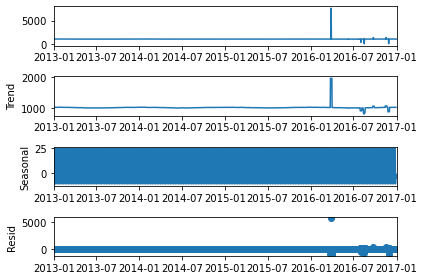

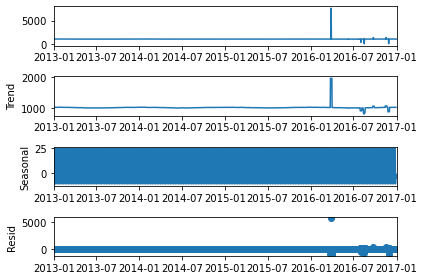

In [138]:
Seasonal_Results.plot() 

<AxesSubplot:xlabel='date'>

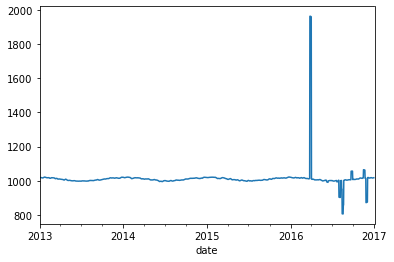

In [139]:
Seasonal_Results.trend.plot() 

<AxesSubplot:xlabel='date'>

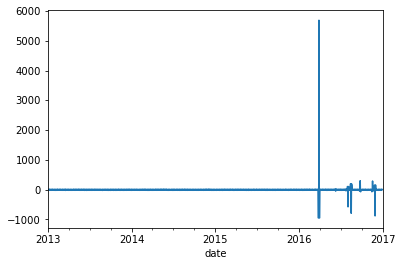

In [140]:
Seasonal_Results.resid.plot() 

<AxesSubplot:xlabel='date'>

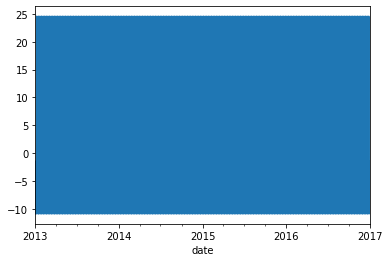

In [142]:
Seasonal_Results.seasonal.plot() 

In [143]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf 

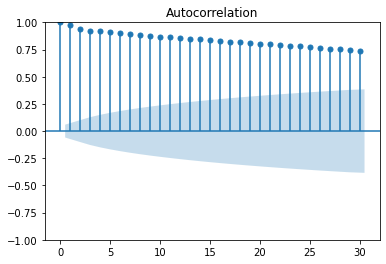

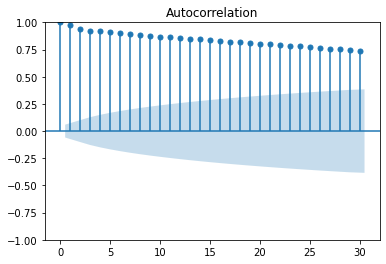

In [144]:
plot_acf(train, lags=30)

C:\Users\alexh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


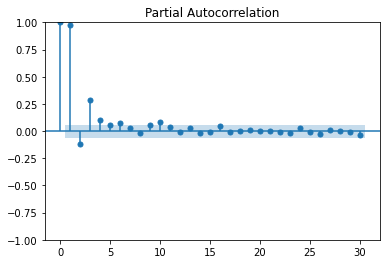

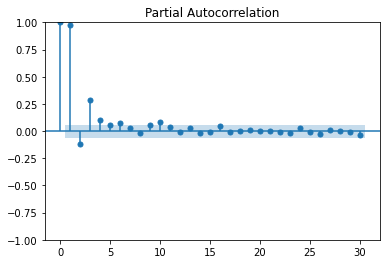

In [145]:
plot_pacf(train, lags=30) 

In [146]:
from pmdarima import auto_arima

In [147]:
auto_arima(train, trace=True) 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4143.878, Time=1.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7574.882, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4259.818, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6303.576, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18288.960, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4159.049, Time=1.91 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4221.635, Time=1.74 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=4136.697, Time=2.18 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4139.973, Time=2.12 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=4136.366, Time=2.49 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=4142.295, Time=2.25 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=4136.025, Time=4.33 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=4138.071, Time=5.51 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=4130.050, Time=5.48 sec
 ARIMA(4,0,3)(0,0,0)[0] intercep

ARIMA(order=(1, 0, 3), scoring_args={}, suppress_warnings=True)

In [148]:
from statsmodels.tsa.arima.model import ARIMA 

In [150]:
A_Model = ARIMA(train, order=(1, 0, 3))  

In [151]:
predictor = A_Model.fit() 

In [153]:
PredictedResults = predictor.predict(start=len(train), end=len(train) + len(test) -1, type="Levels") 

In [154]:
PredictedResults

2016-01-03    1020.566680
2016-01-04    1020.308453
2016-01-05    1020.122463
2016-01-06    1020.062100
2016-01-07    1020.002118
                 ...     
2016-12-28    1011.549749
2016-12-29    1011.543492
2016-12-30    1011.537274
2016-12-31    1011.531095
2017-01-01    1011.524956
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


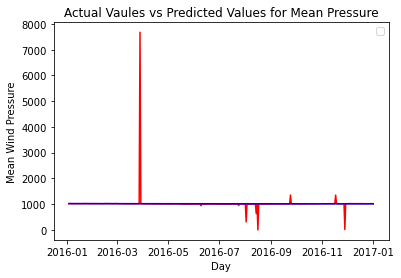

In [155]:
plt.plot(test, color="red")
plt.plot(PredictedResults, color="blue")
plt.title("Actual Vaules vs Predicted Values for Mean Pressure")
plt.xlabel("Day")
plt.ylabel("Mean Wind Pressure")
plt.legend()
plt.show() 

In [157]:
import math
from sklearn.metrics import mean_squared_error 

In [158]:
RMSE = math.sqrt(mean_squared_error(test, PredictedResults))

In [159]:
RMSE

360.1189503120623